In [109]:
import pandas as pd
import numpy as np

In [110]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal     import seasonal_decompose, STL
from statsmodels.tsa.stattools import adfuller

from datetime import datetime,timedelta
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from statsmodels.tsa.stattools         import  pacf
from statsmodels.tsa.stattools         import  acf
from statsmodels.graphics.tsaplots     import  plot_pacf
from statsmodels.graphics.tsaplots     import  plot_acf
from statsmodels.graphics.gofplots     import qqplot
from statsmodels.tsa.arima_model       import  ARMA, ARIMA
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import tensorflow as tf

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline

import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [176]:
 df = pd.read_excel('Sample Commodities_Vegetables_Hyderabad_Market.xlsx',
                    sheet_name="BeetRoot",parse_dates =["Date"], index_col ='Date')
df.head(2)

,Variety Name,Arrivals(Qtls),Maximum,Minimum,Model,Purchase by
Date,,,,,,
2017-01-01,Beetroot,7,800.0000,800,800,Private Traders
2017-01-02,Beetroot,2,800.0000,800,800,Private Traders


In [177]:
df.tail(2)

,Variety Name,Arrivals(Qtls),Maximum,Minimum,Model,Purchase by
Date,,,,,,
2019-12-28,Beetroot,3,2000.0000,1800,1900,Private Traders
2019-12-30,Beetroot,5,3000.0000,3000,3000,Private Traders


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 583 entries, 2017-01-01 to 2019-12-30
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Variety Name    583 non-null    object 
 1   Arrivals(Qtls)  583 non-null    int64  
 2   Maximum         582 non-null    float64
 3   Minimum         583 non-null    int64  
 4   Model           583 non-null    int64  
 5   Purchase by     583 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 31.9+ KB


In [179]:
df.isnull().sum()

Variety Name      0
Arrivals(Qtls)    0
Maximum           1
Minimum           0
Model             0
Purchase by       0
dtype: int64

In [180]:
df.describe()

,Arrivals(Qtls),Maximum,Minimum,Model
count,583.0000,582.0000,583.0000,583.0000
mean,42.2744,1677.9553,1636.6209,1787.2058
std,380.7700,810.0510,776.2150,3338.3144
min,1.0000,300.0000,200.0000,200.0000
25%,3.0000,1000.0000,1000.0000,1000.0000
50%,5.0000,1600.0000,1600.0000,1600.0000
75%,6.0000,2000.0000,2000.0000,2000.0000
max,5405.0000,6020.0000,4200.0000,80021.0000


In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

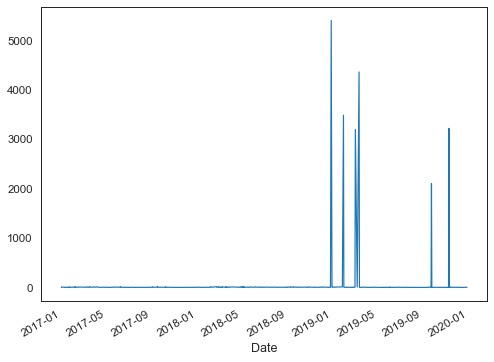

In [182]:
df['Arrivals(Qtls)'].plot(figsize=(8,6))
plt.show()

In [183]:
dt = pd.date_range(start ='01-01-2017', end ='30-12-2019', freq ='D' )
dt

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2019-12-21', '2019-12-22', '2019-12-23', '2019-12-24',
               '2019-12-25', '2019-12-26', '2019-12-27', '2019-12-28',
               '2019-12-29', '2019-12-30'],
              dtype='datetime64[ns]', length=1094, freq='D')

In [243]:
df1 = pd.DataFrame(columns=['Arrivals(Qtls)'],data=df, index = dt)
df1.head(10)

,Arrivals(Qtls)
2017-01-01,7.0000
2017-01-02,2.0000
2017-01-03,9.0000
2017-01-04,9.0000
2017-01-05,6.0000
2017-01-06,6.0000
2017-01-07,5.0000
2017-01-08,7.0000
2017-01-09,6.0000
2017-01-10,2.0000


In [244]:
df1.isnull().sum()

Arrivals(Qtls)    511
dtype: int64

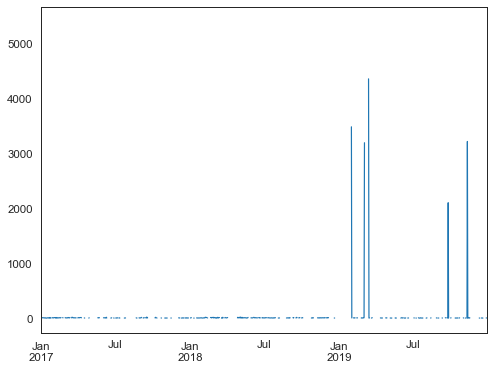

In [245]:
df1['Arrivals(Qtls)'].plot(figsize=(8,6))
plt.show()

In [246]:
df1 = df1.fillna(df1.rolling(22,min_periods=1).mean())

In [247]:
df1.isnull().sum()

Arrivals(Qtls)    0
dtype: int64

#### the null values are filled after 22 datapoints

In [248]:
df1.value_counts()

Arrivals(Qtls)
5.0000            122
2.0000            120
3.0000             96
4.0000             64
6.0000             58
                 ... 
6.4667              1
6.4706              1
2.7500              1
6.5333              1
5405.0000           1
Length: 255, dtype: int64

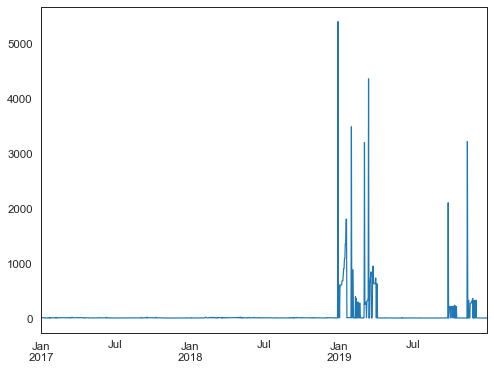

In [249]:
df1['Arrivals(Qtls)'].plot(figsize=(8,6))
plt.show()

In [250]:
q1= df1.quantile(0.25)
q3 = df1.quantile(0.75)
qmax= df1.quantile(0.90)
q1,q3,qmax

(Arrivals(Qtls)   3.0000
 Name: 0.25, dtype: float64,
 Arrivals(Qtls)   6.9436
 Name: 0.75, dtype: float64,
 Arrivals(Qtls)   11.0000
 Name: 0.9, dtype: float64)

In [251]:
for i in range(len(df)):
    if df['Arrivals(Qtls)'][i] >=20.0:
        print(df['Arrivals(Qtls)'][i])
        #df1['Arrivals(Qtls)'][i] = 20

20
20
5405
3487
3197
4361
2103
3220


##### df has 8 values >20 quintals... looks like TYPO error.. so treating the outlier and capping at Q3(third quartile )value


In [252]:
for i in range(len(df1)):
    if df1['Arrivals(Qtls)'][i] >=20.0:
        print(df1['Arrivals(Qtls)'][i])
        df1['Arrivals(Qtls)'][i] = q3

20.0
20.0
5405.0
604.3333333333334
604.3333333333334
544.5
604.1111111111111
604.1111111111111
604.1111111111111
604.1111111111111
679.0
679.0
679.0
775.7142857142857
904.6666666666666
904.6666666666666
1084.6
1084.6
1355.25
1355.25
1805.3333333333333
1805.3333333333333
3487.0
877.75
877.75
877.75
392.6666666666667
353.6
295.0833333333333
272.84615384615387
272.0769230769231
272.0769230769231
3197.0
249.84615384615384
249.84615384615384
270.3333333333333
294.3636363636364
294.8181818181818
323.7
323.7
359.44444444444446
4361.0
633.3333333333334
690.6363636363636
759.1
843.3333333333334
843.5555555555555
948.0
626.7142857142857
626.7142857142857
626.7142857142857
626.7142857142857
626.7142857142857
729.6666666666666
729.6666666666666
625.8571428571429
625.8571428571429
2103.0
194.45454545454547
194.45454545454547
213.5
213.5
213.8
213.8
213.8
213.8
214.0
214.0
236.88888888888889
212.9
3220.0
324.4
271.1666666666667
271.1666666666667
271.1666666666667
295.54545454545456
295.5454545454545

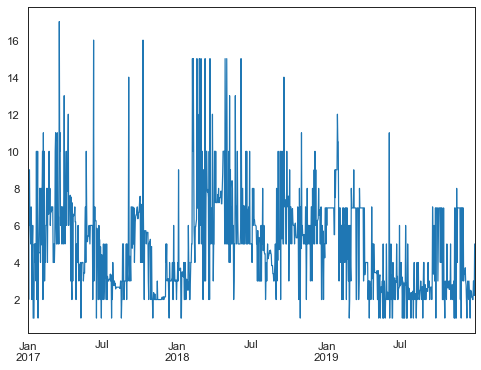

In [253]:
df1['Arrivals(Qtls)'].plot(figsize=(8,6))
plt.show()

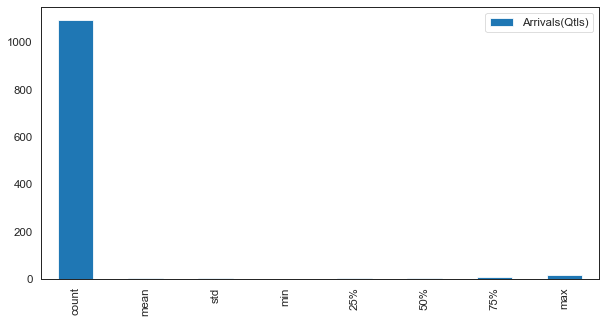

In [254]:
df1.describe().plot.bar(figsize=(10,5))
plt.show()

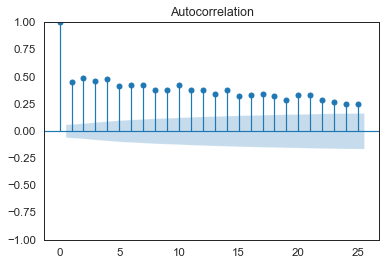

In [255]:
plot_acf(df1, lags =25)
plt.show()

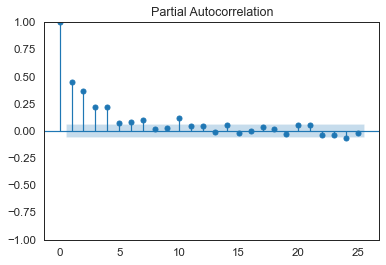

In [256]:
plot_pacf(df1,lags =25)
plt.show()

Statistical Normality Test
There are several statistical tests that we can use to quantify whether our data looks as though it was drawn from a Gaussian distribution. ## And we will use D’Agostino’s K^2 Test.

In the SciPy implementation of the test, we will interpret the p value as follows.

p <= alpha: reject H0, not normal.
p > alpha: fail to reject H0, normal.

In [257]:
stat, p = stats.normaltest(df['Arrivals(Qtls)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=1001.205, p=0.000
Data does not look Gaussian (reject H0)


#### The plot for 200 datapoints ...~ 7 months

<Figure size 576x288 with 0 Axes>

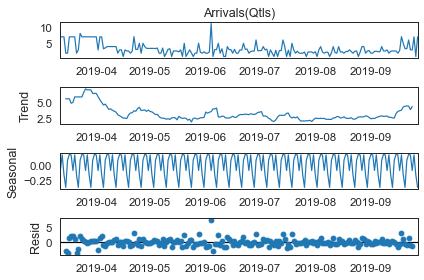

In [258]:
plt.figure(figsize=(8,4))
results = seasonal_decompose(df1['Arrivals(Qtls)'].iloc[800:1000])
results.plot();

#### DICKEY FULLER TEST for STATIONARITY

In [259]:
observations= df1.values
test_result = adfuller(observations)

In [260]:
print('ADF Statistic: %f' % test_result[0])
print('p-value: %f' % test_result[1])
print('Critical Values:')
for key, value in test_result[4].items():
	print('\t%s: %.5f' % (key, value))

ADF Statistic: -3.853804
p-value: 0.002402
Critical Values:
	1%: -3.43640
	5%: -2.86421
	10%: -2.56819


#### LSTM model 

In [261]:
dataset = df1['Arrivals(Qtls)'].values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [262]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [263]:
# reshape into X=t and Y=t+1
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

#### MODEL ARCHITECTURE

In [264]:
X_train.shape

(844, 30)

In [265]:
Y_train.shape

(844,)

In [266]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [267]:
X_train.shape

(844, 1, 30)

In [268]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

# Training Phase
model.summary()

Epoch 1/20
13/13 [==============================] - 6s 91ms/step - loss: 0.0492 - val_loss: 0.0159
Epoch 2/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0274 - val_loss: 0.0140
Epoch 3/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0227 - val_loss: 0.0125
Epoch 4/20
13/13 [==============================] - 0s 11ms/step - loss: 0.0224 - val_loss: 0.0127
Epoch 5/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0208 - val_loss: 0.0120
Epoch 6/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0205 - val_loss: 0.0115
Epoch 7/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0204 - val_loss: 0.0114
Epoch 8/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0196 - val_loss: 0.0111
Epoch 9/20
13/13 [==============================] - 0s 15ms/step - loss: 0.0196 - val_loss: 0.0108
Epoch 10/20
13/13 [==============================] - 0s 21ms/step - loss: 0.0197 - val_loss: 0.0106
Epoch 11/

In [269]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 1.3830048300643667
Train Root Mean Squared Error: 2.1186220279709143
Test Mean Absolute Error: 1.2046515928938033
Test Root Mean Squared Error: 1.6178351666939037


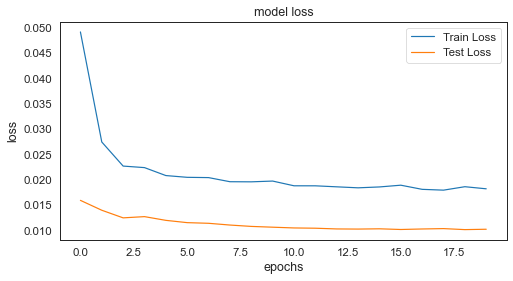

In [270]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

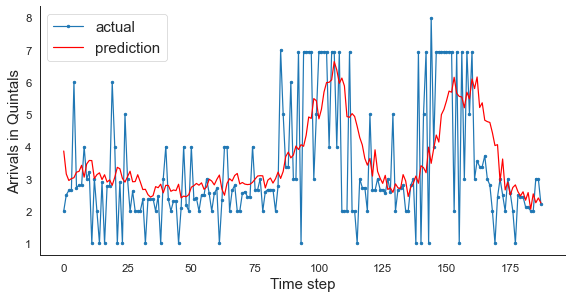

In [271]:
aa=[x for x in range(188)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Arrivals in Quintals', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

Kurtosis of normal distribution: 1.854456962705986
Skewness of normal distribution: 1.0731454283933726


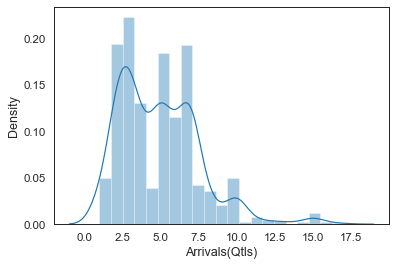

In [272]:
# print(df['Arrivals(Qtls)'].describe())
sns.distplot(df1['Arrivals(Qtls)']);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(df1['Arrivals(Qtls)'])))
print( 'Skewness of normal distribution: {}'.format(stats.skew(df1['Arrivals(Qtls)'])))

,count,mean,std,min,25%,50%,75%,max
Arrivals(Qtls),1094.0000,4.9418,2.6509,1.0000,3.0000,5.0000,6.9430,17.0000


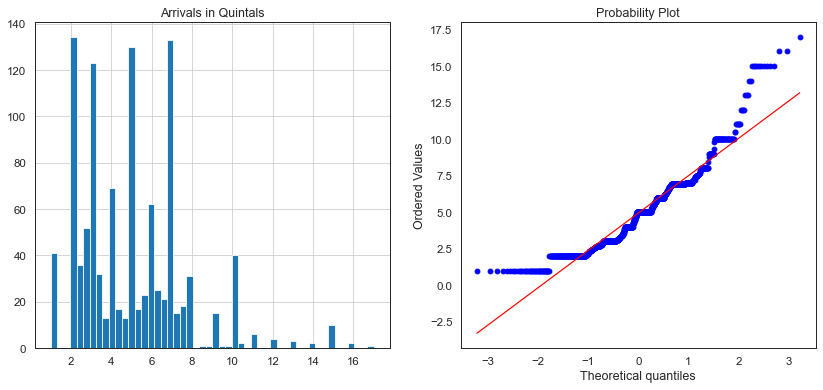

In [273]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df1['Arrivals(Qtls)'].hist(bins=50)
plt.title('Arrivals in Quintals')

plt.subplot(1,2,2)
stats.probplot(df1['Arrivals(Qtls)'], plot=plt);
df1.describe().T

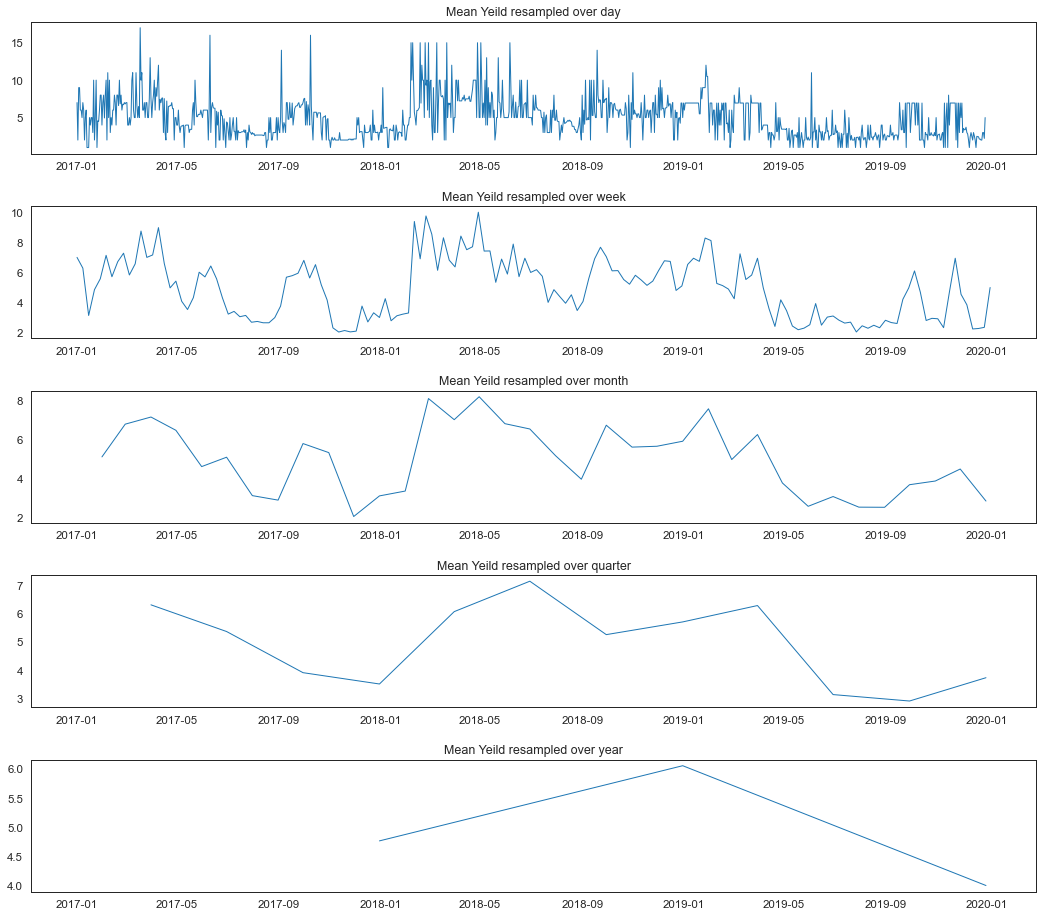

In [274]:
fig = plt.figure(figsize=(18,16))
fig.subplots_adjust(hspace=.4)
ax1 = fig.add_subplot(5,1,1)
ax1.plot(df1['Arrivals(Qtls)'].resample('D').mean(),linewidth=1)
ax1.set_title('Mean Yeild resampled over day')
ax1.tick_params(axis='both', which='major')

ax2 = fig.add_subplot(5,1,2, sharex=ax1)
ax2.plot(df1['Arrivals(Qtls)'].resample('W').mean(),linewidth=1)
ax2.set_title('Mean Yeild resampled over week')
ax2.tick_params(axis='both', which='major')

ax3 = fig.add_subplot(5,1,3, sharex=ax1)
ax3.plot(df1['Arrivals(Qtls)'].resample('M').mean(),linewidth=1)
ax3.set_title('Mean Yeild resampled over month')
ax3.tick_params(axis='both', which='major')

ax4  = fig.add_subplot(5,1,4, sharex=ax1)
ax4.plot(df1['Arrivals(Qtls)'].resample('Q').mean(),linewidth=1)
ax4.set_title('Mean Yeild resampled over quarter')
ax4.tick_params(axis='both', which='major')

ax5  = fig.add_subplot(5,1,5, sharex=ax1)
ax5.plot(df1['Arrivals(Qtls)'].resample('A').mean(),linewidth=1)
ax5.set_title('Mean Yeild resampled over year')
ax5.tick_params(axis='both', which='major');